In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
data = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test_ids=test["PassengerId"]


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing # Transformação de dados 
from sklearn.model_selection import train_test_split # Partir dados em amostras
from sklearn.tree import DecisionTreeClassifier # Modelo Árvore de Decisão
from sklearn.ensemble import RandomForestClassifier # Modelo Floresta Aleatória
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Métodos para avaliar acurácia dos modelos


## EDA


O Kaggle oferece dois arquivos csv: o train.csv e o test.csv. A Análise foi feita em cima do train.csv que traz as seguintes informações:
PassengerId: que traz o id de cada passageiro; int64;
Survived: traz 0 caso tenha não tenha sobrevivido e 1 caso tenha sobrevivido; int64;
Pclass: traz a classe de casa passageiro, baseado no status sócio-econômico; int64;
1 - Classe alta;
2 - Classe média;
3 - Classe baixa;
Name: nome; object;
Age: Idade; float64;
Sex: sexo; object;
SibSp: o número total de irmãos/esposa do passageiro; int64;
Parch: o número total de pais/filhos do passageiro; int64;
Ticket: o ticket; object;
Cabin: o número da cabine; object
Fare: a Tarifa do passageiro; float64;
Embarked: traz o local de onde embarcou; object;
C = Cherbourg
Q = Queenstown
S = Southampton


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Removing outliers

In [7]:
column_names = ['Age', 'Fare']
for names in column_names[1:]:
  for x in [names]:
    q75, q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max= q75+(1.5*intr_qr)
    min= q25-(1.5*intr_qr)

    data.loc[data[x] < min, x] = np.nan
    data.loc[data[x] > max, x] = np.nan
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,775.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,17.822091
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,13.578085
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,26.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,65.000000


# Cleaning Data

In [8]:
def clean(data):
    data=data.drop(["Ticket", "Cabin", "Name", "PassengerId"], axis = 1)

    cols=["Pclass", "Age", "Parch", "Fare"]
    for col in cols:
        data[col].fillna(data[col].median(), inplace = True) # Foi trocado os valores sem valores pela media da coluna
    data.Embarked.fillna("I", inplace = True) #havia muita gente sem local de embarque, para eles coloquei I como local de embarque
    return data

data = clean(data)
test = clean(test)

In [9]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.250,S
1,1,1,female,38.0,1,0,13.000,C
2,1,3,female,26.0,0,0,7.925,S
3,1,1,female,35.0,1,0,53.100,S
4,0,3,male,35.0,0,0,8.050,S


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

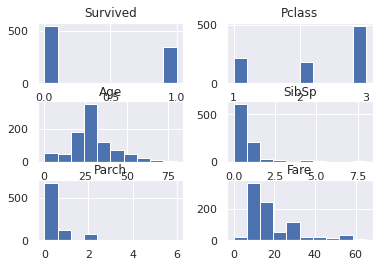

In [10]:
data.hist()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

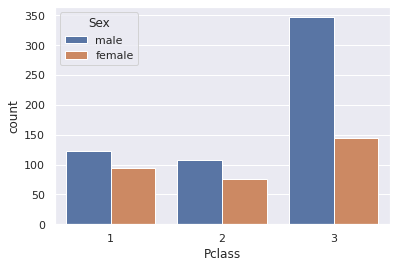

In [11]:
sns.countplot(x='Pclass',hue='Sex',data=data,)

Muito mais homens em classes baixas

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

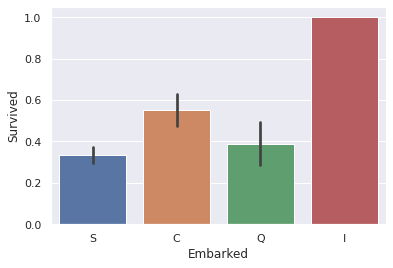

In [12]:
sns.barplot(x='Embarked',y='Survived',data=data)

Maioria que embarcou em Southampton não sobreviveu

<AxesSubplot:xlabel='Survived', ylabel='Age'>

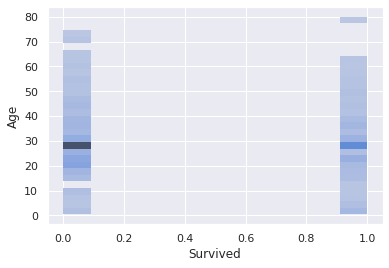

In [13]:
sns.histplot(x='Survived',y="Age",data=data)

Sexo é altamente relacionado com a chance de sobreviver
Pclass é moderado
Fare é moderado também

<AxesSubplot:xlabel='Survived', ylabel='count'>

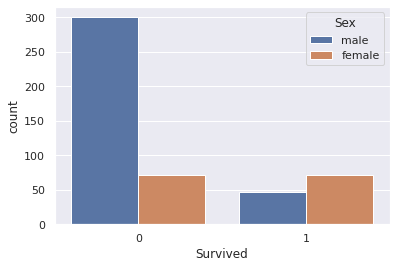

In [14]:
df_3class = data[data['Pclass']==3]

sns.countplot(x='Survived',hue='Sex',data=df_3class)

Para classe mais baixa, ser mulher aumenta suas chances de sobreviver

Agora vou categorizar a idade:
* <12 == 0 
* 12-17 == 1
* 18 - 40 == 2
* 41-55 == 3
* 56-64 == 4 
* 65+ == 5

In [15]:
def age_group(Age):
    if Age<12:
        return 0
    if Age<18:
        return 1
    if Age<41:
        return 2
    if Age<56:
        return 3
    if Age<65:
        return 4
    elif Age>=65:
        return 5
    
data['age_group'] = data['Age'].map(age_group)

data.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
age_group    0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

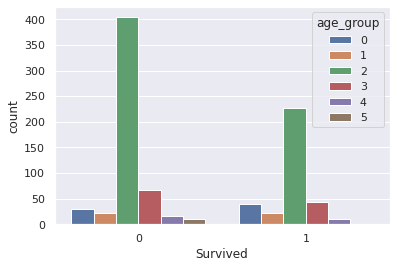

In [16]:
sns.countplot(x='Survived',hue='age_group',data=data)

In [17]:
le = preprocessing.LabelEncoder()
cols = ["Sex", "Embarked"]

for col in cols:
    data[col] = le.fit_transform(data[col])
    test[col] = le.transform(test[col])
    
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_group
0,0,3,1,22.0,1,0,7.250,3,2
1,1,1,0,38.0,1,0,13.000,0,2
2,1,3,0,26.0,0,0,7.925,3,2
3,1,1,0,35.0,1,0,53.100,3,2
4,0,3,1,35.0,0,0,8.050,3,2


In [18]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_group
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,17.194299,2.343434,2.019080
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,12.766009,1.167398,0.845793
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,2.000000,2.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,13.000000,3.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,24.150000,3.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,65.000000,3.000000,5.000000


<AxesSubplot:>

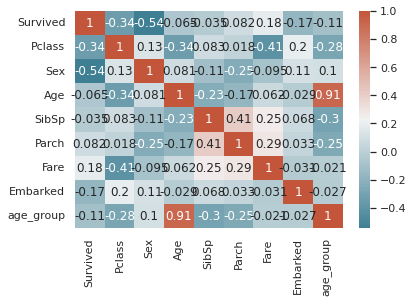

In [19]:
# calculate correlation matrix
corr = data.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

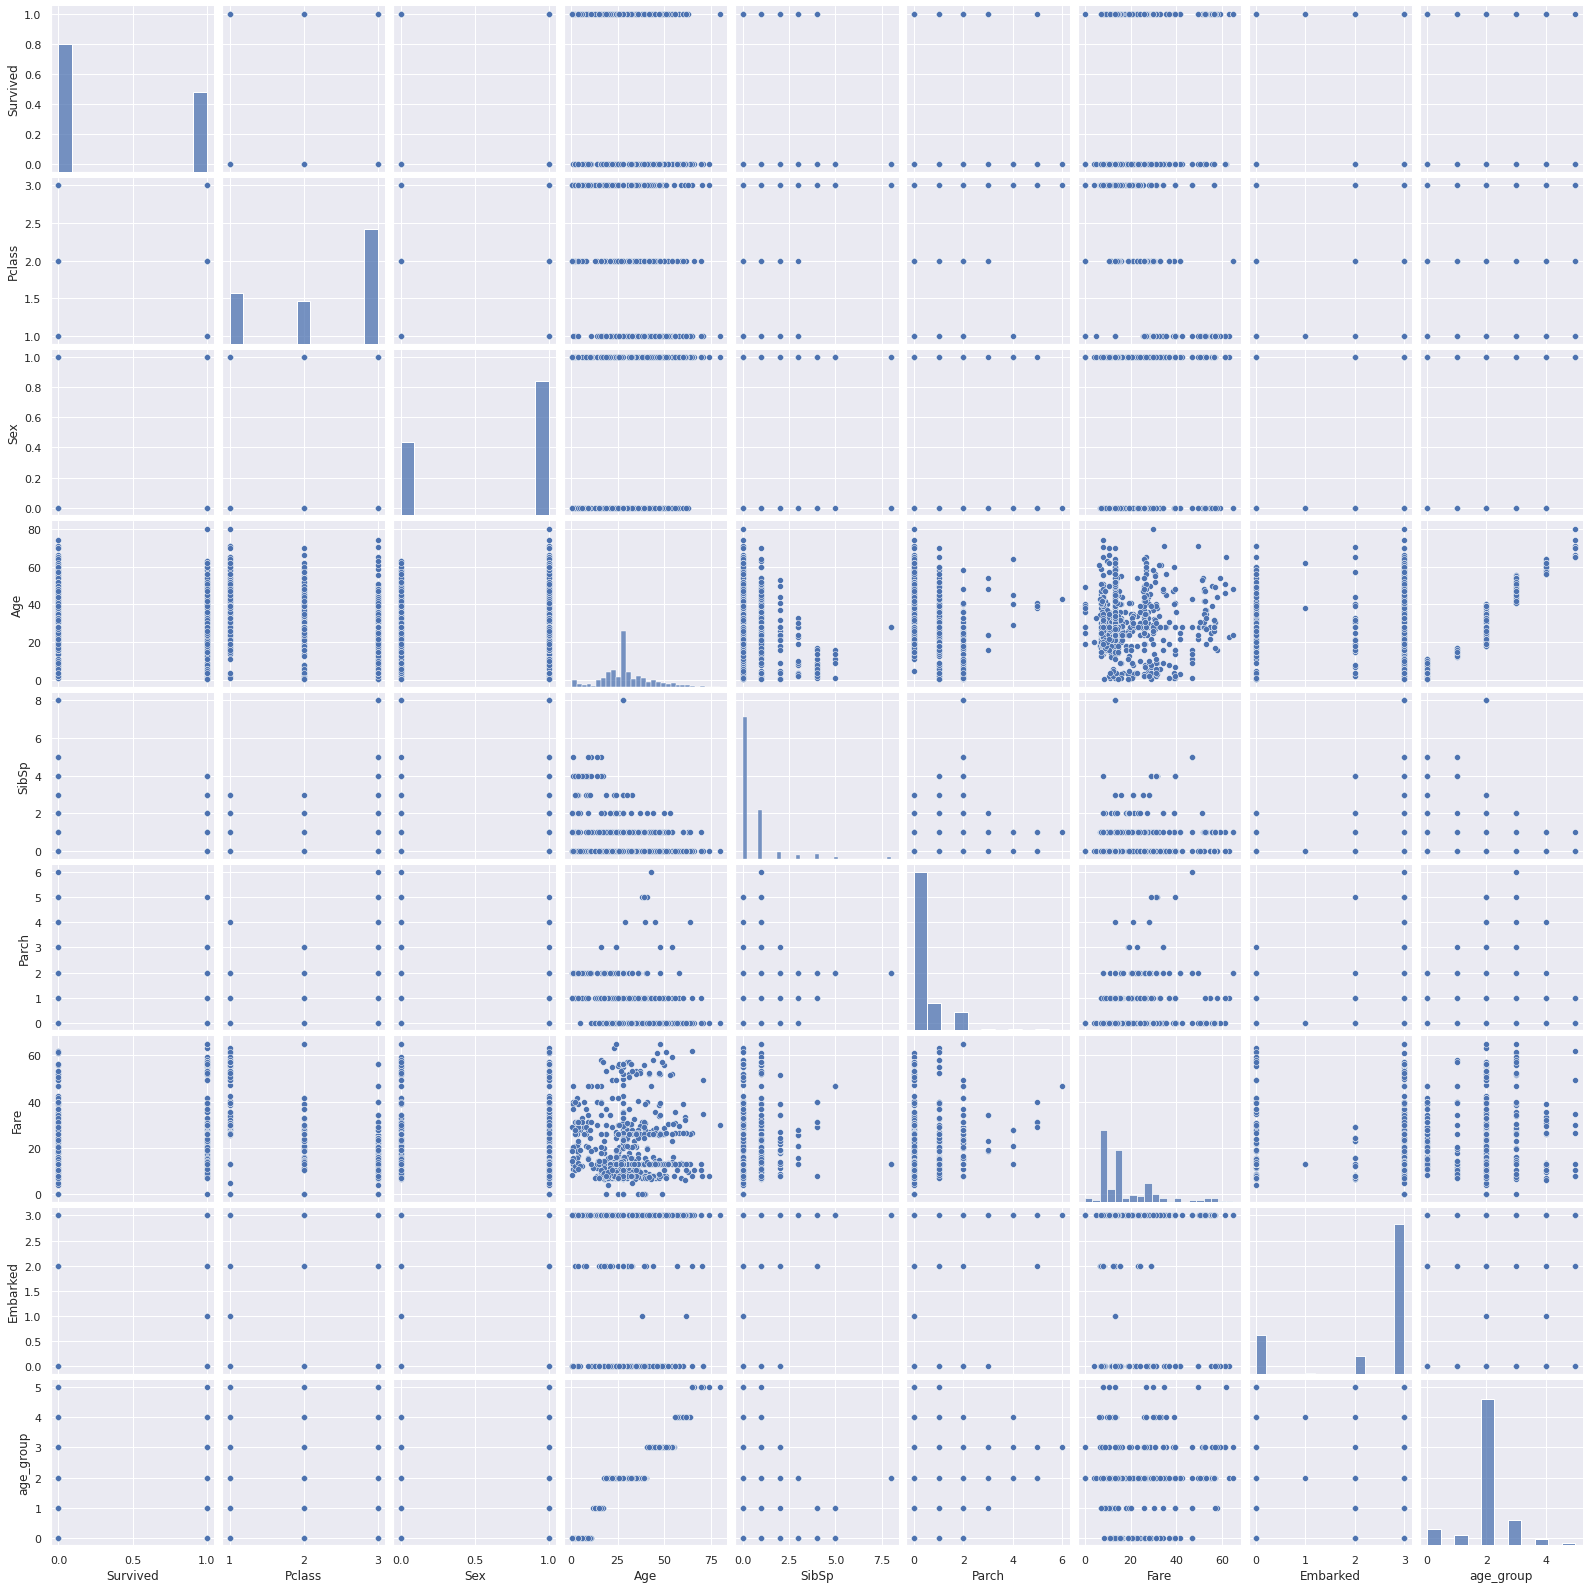

In [20]:
sns.pairplot(data)

In [21]:
variaveis = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
adjusted_variables = preprocessing.MinMaxScaler()

In [22]:
# Definindo as variáveis de Entrada e Saída dos modelos
input_variables = adjusted_variables.fit_transform(data[variaveis])
output_variables = data['Survived']

teste = adjusted_variables.fit_transform(test[variaveis])

In [23]:
# Criando os conuntos de variáveis que serão partidas em Treino e Teste
x = input_variables   
y = output_variables

In [24]:
# Defininando os dados de Treino (70%) e Teste (30%) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42) 

In [25]:
# Construíndo o modelo Random Forest  
clf_forest = RandomForestClassifier(max_depth=5, random_state=1)

# Treinando o modelo
clf_forest.fit(x_train, y_train)

# Testando o modelol
y_forecast_forest = clf_forest.predict(x_test)

In [26]:
print(f'Acurácia do Modelo Random Forest: {accuracy_score(y_test, y_forecast_forest)*100}')

Acurácia do Modelo Random Forest: 81.34328358208955


In [27]:
submission = clf_forest.predict(teste)

In [28]:
df = pd.DataFrame({"PassengerId":test_ids.values,
                  "Survived":submission})

In [29]:
df.head()
df.to_csv("submission4.csv", index= False)